In [1]:
#Import the modules needed
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

In [29]:
#funktion to read a file safely
def read_dna_file(dna_file):
    try: #if it is a file, open and read 
        with open(dna_file, "r") as f:
            file_text =f.read()
        return file_text
    except: #if not, print message
        print("You need to put in a correct dna.txt file") 
        

In [30]:
#function to split and clean file, each sequence clean and added to a list
def clean_data(text):
    dna_data_strings = []
    text = text.split("\n>")  
    for data in text:
        y = data[5:].lower()  
        y = re.sub("\n", "", y)
        dna_data_strings.append(y)
    return dna_data_strings #return the list with the strings 

In [31]:
#function to chart each list of digits with the list of letters
def print_charts(letter_list, digit_list):
    x=1
    for digit in digit_list: #go through each list in the list of numbers
        fig=plt.figure()
        ax=plt.axes()
        ax.bar(letter_list, digit)
        ax.set(xlabel='DNA letters', ylabel='Frequency', title=(f"DNA sequence {x}"))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(4)) #decide the spacing in y-axel and avoid decimals. Got idea from Rikard O
        x+=1 #to get the name (digit) of the chart updated with each loop

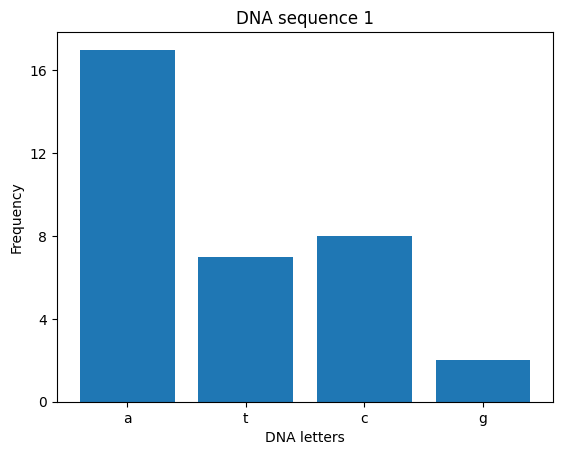

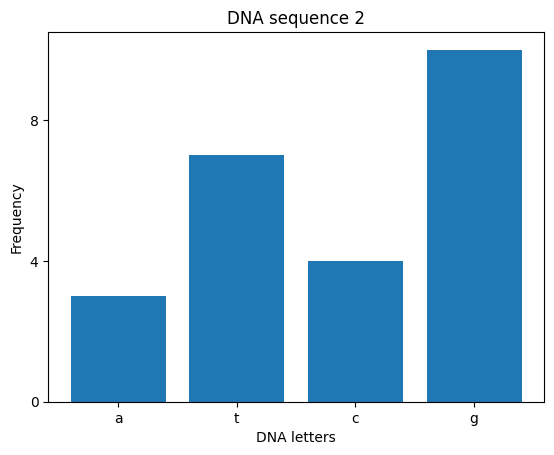

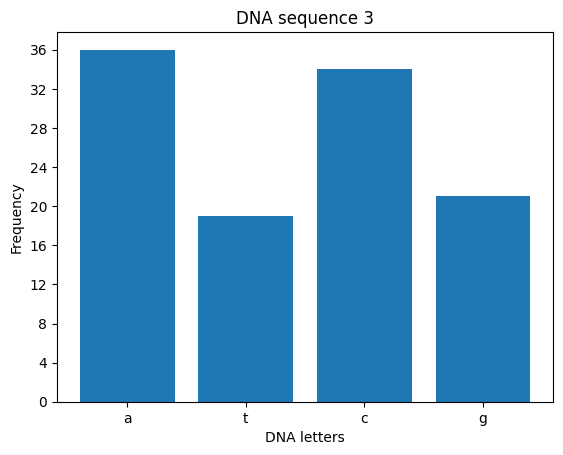

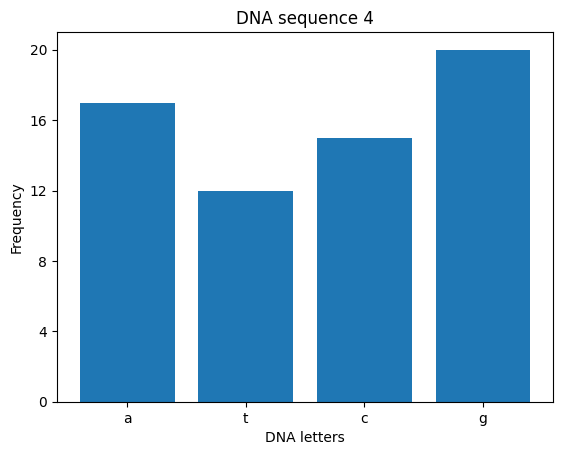

In [34]:
data_file = read_dna_file("dna_raw_complicated.txt") #call function
if data_file != None:  #if it is right file type, continue with code

    clean_strings = clean_data(data_file) #call function
    
    #create a dictionary with the letters and give value 0
    dna_data = {value: 0 for key, value in enumerate("atcg")}

    #count each letter in each sequence and pair with the letters in dictionary
    count_list = []
    for x in range(len(clean_strings)):
            for key, value in dna_data.items():
                dna_data['a'] = clean_strings[x].count("a")
                dna_data['t'] = clean_strings[x].count("t")
                dna_data['c'] = clean_strings[x].count("c")
                dna_data['g'] = clean_strings[x].count("g")  
            
            # extract the key and value of the dicts in to lists to be able to put in chart later
            letters = list(dna_data.keys())
            count = list(dna_data.values())
            count_list.append(count) #add the lists of numbers to a list each loop 
    
    print_charts(letters, count_list) #call function to print charts 

else: #if return from read_file is None (not right argument type), print the message
    print("Try another file")

found webbsite with explanation to extract keys and values in dicts before putting them in charts 
https://pythonguides.com/matplotlib-plot-bar-chart-from-dict-python/ 